# 1.0 Import Libraries and Dataset


In [ ]:
!pip install pandas-profiling==2.9.0

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 604kB 8.9MB/s 
     |████████████████████████████████| 3.1MB 16.1MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 296kB 30.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=7bac5f0f4e87dbaa2971116f14cfb01c049f5917bcf4b7bd953353bd0ee64462
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=724c6679848dda784a2681ca8e2e6a75fb77e32758828064d3ab2c8ed2f1c20d
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
from datetime import datetime

In [192]:
#Import data from google
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"

data = pd.read_csv(link)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601818 entries, 0 to 2601817
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

In [194]:
#pandas_profiling.ProfileReport(data)

# 2.0 Pre-processing and Cleaning

In [195]:
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [196]:
data.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

In [197]:
#Copying only columns that I want from Brazil
data_br = data_br = data.loc[data.country_region == "Brazil",:].iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()

In [198]:
#Change the columns name
data_br.columns = ["country", "state", "city", "date", "retail", "grocery", "parks", "transit", "workplaces", "residential"]

In [199]:
#Converting to DataTime formatt
data_br.date = pd.to_datetime(data_br.date)

In [200]:
#change the date column to be the index
data_br.index = data_br.date
data_br.drop(labels="date", axis=1, inplace=True)
data_br

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...
2020-09-21,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-2.0,NaN
2020-09-22,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-8.0,NaN
2020-09-23,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-6.0,NaN


In [201]:
data_br.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416096 entries, 2020-02-15 to 2020-09-25
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      416096 non-null  object 
 1   state        415872 non-null  object 
 2   city         409824 non-null  object 
 3   retail       145863 non-null  float64
 4   grocery      142791 non-null  float64
 5   parks        127234 non-null  float64
 6   transit      106055 non-null  float64
 7   workplaces   398770 non-null  float64
 8   residential  158147 non-null  float64
dtypes: float64(6), object(3)
memory usage: 31.7+ MB


In [202]:
data_br.loc[~data_br.state.isnull()]

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,Federal District,NaN,10.0,7.0,-8.0,8.0,8.0,0.0
2020-02-16,Brazil,Federal District,NaN,11.0,6.0,-10.0,4.0,0.0,2.0
2020-02-17,Brazil,Federal District,NaN,2.0,4.0,-1.0,11.0,22.0,-2.0
2020-02-18,Brazil,Federal District,NaN,1.0,4.0,2.0,14.0,22.0,-2.0
2020-02-19,Brazil,Federal District,NaN,-2.0,0.0,-3.0,9.0,20.0,-2.0
...,...,...,...,...,...,...,...,...,...
2020-09-21,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-2.0,NaN
2020-09-22,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-8.0,NaN
2020-09-23,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-6.0,NaN


In [203]:
#Cleaning column state
data_br.state = data_br.state.str.replace("State of ", "")

In [204]:
len(data_br.state.unique())

28

In [205]:
data_br.state.unique()

array([nan, 'Federal District', 'Acre', 'Alagoas', 'Amapá', 'Amazonas',
       'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [206]:
data_br.loc[~data_br.state.isnull() & ~data_br.city.isnull()]

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-25,Brazil,Acre,Brasiléia,NaN,NaN,NaN,NaN,-41.0,NaN
2020-03-24,Brazil,Acre,Brasiléia,NaN,NaN,NaN,NaN,-40.0,NaN
2020-03-25,Brazil,Acre,Brasiléia,NaN,NaN,NaN,NaN,-43.0,NaN
2020-04-10,Brazil,Acre,Brasiléia,NaN,NaN,NaN,NaN,-65.0,NaN
2020-04-21,Brazil,Acre,Brasiléia,NaN,NaN,NaN,NaN,-44.0,NaN
...,...,...,...,...,...,...,...,...,...
2020-09-21,Brazil,Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-2.0,NaN
2020-09-22,Brazil,Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-8.0,NaN
2020-09-23,Brazil,Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-6.0,NaN


In [214]:
#Getting only until August
data_br = data_br.loc['2020-01-01':'2020-08-15']

In [277]:
data_br.head()

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0


In [ ]:
plt.style.use("fivethirtyeight")

In [226]:
#Getting only NortEast capitals
data_br_ne_capitals = data_br.loc[~data_br.state.isnull() & (data_br.city.str.match("São Luís") | data_br.city.str.match("Teresina")| data_br.city.str.match("Fortaleza")| data_br.city.str.match("Natal")| data_br.city.str.match("João Pessoa")| data_br.city.str.match("Recife")| data_br.city.str.match("Maceió")| data_br.city.str.match("Aracaju"))].copy()

In [228]:
data_br_ne_capitals

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,Alagoas,Maceió,15.0,9.0,73.0,0.0,-1.0,-1.0
2020-02-16,Brazil,Alagoas,Maceió,5.0,6.0,-8.0,-2.0,-2.0,3.0
2020-02-17,Brazil,Alagoas,Maceió,-5.0,2.0,-8.0,4.0,14.0,0.0
2020-02-18,Brazil,Alagoas,Maceió,-3.0,0.0,-11.0,0.0,13.0,-1.0
2020-02-19,Brazil,Alagoas,Maceió,1.0,1.0,-8.0,3.0,12.0,-1.0
...,...,...,...,...,...,...,...,...,...
2020-08-11,Brazil,Sergipe,Aracaju,-37.0,8.0,-51.0,-50.0,-34.0,15.0
2020-08-12,Brazil,Sergipe,Aracaju,-40.0,3.0,-48.0,-52.0,-34.0,15.0
2020-08-13,Brazil,Sergipe,Aracaju,-37.0,0.0,-51.0,-48.0,-34.0,15.0


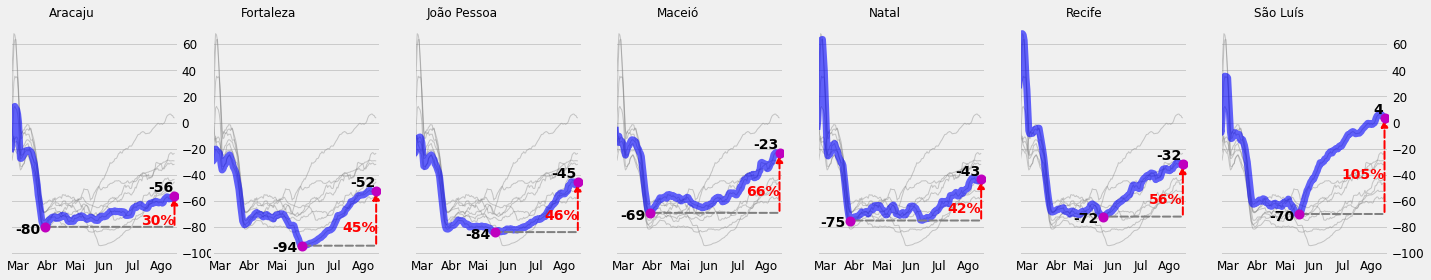

In [299]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(22,4))

item = 'parks' #"retail", grocery, parks, transit, workplaces, residential
cities = ["São Luís", "Fortaleza", "Natal", "João Pessoa", "Recife", "Maceió", "Aracaju"]
cities = sorted(cities)


for i, city in enumerate(cities):
  data_br_ne_capitals.groupby(by=[data_br_ne_capitals.index, "city"]).mean().unstack()[item].rolling(window=7).mean().plot(legend=False,color="grey",linewidth=1,alpha=0.4, ax=ax[i])
  data_br_ne_capitals.groupby(by=[data_br_ne_capitals.index, "city"]).mean().unstack()[item][city].rolling(window=7).mean().plot(legend=False, color="blue", linewidth=7, alpha=0.6, ax=ax[i])
  ax[i].set_title(city, fontsize=12, ha='right')
  ax[i].xaxis.grid(False)
  ax[i].set_xlabel("")
  
  ax[i].set_xticklabels(["", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago"])
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)
  
  #Calculando o valor mínimo
  yMinValue = data_br_ne_capitals.groupby(by=[data_br_ne_capitals.index, "city"]).mean().unstack()[item][city].rolling(window=7).mean().min()
  xMinValue = data_br_ne_capitals.groupby(by=[data_br_ne_capitals.index, "city"]).mean().unstack()[item][city].rolling(window=7).mean().idxmin()

  #Calculando o último valor
  yLastValue = data_br_ne_capitals.groupby(by=[data_br_ne_capitals.index, "city"]).mean().unstack()[item][city].rolling(window=7).mean().iloc[-1]
  xLastValue = data_br_ne_capitals.groupby(by=[data_br_ne_capitals.index, "city"]).mean().unstack()[item][city].rolling(window=7).mean().last_valid_index()
  
  # Setando o ponto mínimo no gráfico
  ax[i].scatter(xMinValue,yMinValue,marker='o',color='m',linewidth=4,zorder=4)
  ax[i].annotate('{0:.0f}'.format(yMinValue),xy=(xMinValue - pd.DateOffset(5),yMinValue-5),color='black',weight='bold',ha='right')

  # Setando o último ponto no gráfico
  ax[i].scatter(xLastValue,yLastValue,marker='o',color='m',linewidth=4,zorder=4)
  ax[i].annotate('{0:.0f}'.format(yLastValue),xy=(xLastValue - pd.DateOffset(1),yLastValue+3),color='black',weight='bold',ha='right')

  #Linha horizontal
  ax[i].annotate("", xy=(xMinValue,yMinValue), xytext=(xLastValue,yMinValue),
              arrowprops={'arrowstyle': '-', 'ls': 'dashed','lw': 2, 'color': 'grey'}, va='center')

  #Linha Vertical
  ax[i].annotate("", xy=(xLastValue,yLastValue), xytext=(xLastValue,yMinValue),
              arrowprops={'arrowstyle': '-|>', 'ls': 'dashed','lw': 2, 'color': 'red'}, va='center')

  # taxa
  height = yLastValue + (yMinValue - yLastValue)/2
  tax = (1 - (yLastValue/yMinValue))
  ax[i].annotate('{0:.0%}'.format(tax),xy=(xLastValue,height-10),color='red',weight='bold',ha='right')

  #adjust
  ax[i].set_xlim(data_br_ne_capitals.groupby(by=[data_br_ne_capitals.index, "city"]).mean().unstack()[item][city].rolling(window=7).mean().first_valid_index(), xLastValue + pd.DateOffset(4))

  if (i==0) or (i==6):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])

plt.savefig("cities.png", dpi=300)
plt.show()